<a href="https://colab.research.google.com/github/abukalam2909/HRM_Accident_Analysis/blob/main/HRM_Accident_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/My Drive/CSCI-6409_PDS/Project/Traffic_Collisions.csv'
df = pd.read_csv(dataset_path)

## Data Understanding

In [ ]:
df.iloc[[0]]

,OBJECTID,COLLISION_SK,Case File Number,Accident Date and Time,Latitude WGS84,Longitude WGS84,Road Location,Intersecting Road Location,Road Configuration,Collision Configuration,...,Weather Condition,Road Surface,Road Condition,Unusual Environmental Circumstances 1,Unusual Environmental Circumstances 2,Road Alignment,Road Grade,School Purpose Related,x,y
0,1,94351,162686,11/29/2024 11:38:00 AM,44.719783,-63.637095,BEDFORD BYPS,WINDMILL RD,Non-intersection,Single vehicle - hit a moving or stationary ob...,...,Clear,Dry - normal,Normal,Animal,NaN,Straight,Level,NaN,-7.084049e+06,5.577516e+06


In [ ]:
df.head()

,OBJECTID,COLLISION_SK,Case File Number,Accident Date and Time,Latitude WGS84,Longitude WGS84,Road Location,Intersecting Road Location,Road Configuration,Collision Configuration,...,Weather Condition,Road Surface,Road Condition,Unusual Environmental Circumstances 1,Unusual Environmental Circumstances 2,Road Alignment,Road Grade,School Purpose Related,x,y
0,1,94351,162686,11/29/2024 11:38:00 AM,44.719783,-63.637095,BEDFORD BYPS,WINDMILL RD,Non-intersection,Single vehicle - hit a moving or stationary ob...,...,Clear,Dry - normal,Normal,Animal,NaN,Straight,Level,NaN,-7.084049e+06,5.577516e+06
1,2,94528,166309,11/29/2024 9:30:00 PM,44.774726,-63.693915,SACKVILLE DR,IRENE AVE,Intersection - two or more public roads,Multiple vehicle - one crossing path of other ...,...,Clear,Dry - normal,Normal,NaN,NaN,Straight,Level,NaN,-7.090374e+06,5.586128e+06
2,3,94543,162924,11/29/2024 8:03:00 PM,44.660348,-63.627539,JOSEPH HOW DR,DUTCH VILLAGE RD,Intersection - two or more public roads,Multiple vehicle - rear end,...,Clear,Wet,Normal,NaN,NaN,Straight,Level,NaN,-7.082985e+06,5.568209e+06
3,4,94798,171470,11/30/2024 12:30:00 AM,44.708645,-63.676562,34 WINDSTONE CL,NaN,Non-intersection,Multiple vehicle - hit parked vehicle,...,Clear,Dry - normal,Normal,NaN,NaN,NaN,NaN,NaN,-7.088442e+06,5.575771e+06
4,5,94362,162719,11/29/2024 1:02:00 PM,44.630331,-63.619701,BRIGHTON AVE,MARGATE DR,Intersection - two or more public roads,Multiple vehicle - hit parked vehicle,...,Overcast or cloudy,Wet,Normal,NaN,NaN,Straight,Level,NaN,-7.082112e+06,5.563513e+06


In [ ]:
df.columns

Index(['OBJECTID', 'COLLISION_SK', 'Case File Number',
       'Accident Date and Time', 'Latitude WGS84', 'Longitude WGS84',
       'Road Location', 'Intersecting Road Location', 'Road Configuration',
       'Collision Configuration', 'Non Fatal Injury', 'Fatal Injury',
       'Young Demographic', 'Pedestrian Collision', 'Aggressive Driving',
       'Distracted Driving', 'Impaired Driving', 'Bicycle Collision',
       'Intersection Collision', 'Light Condition',
       'Artificial Light Condition', 'Weather Condition', 'Road Surface',
       'Road Condition', 'Unusual Environmental Circumstances 1',
       'Unusual Environmental Circumstances 2', 'Road Alignment', 'Road Grade',
       'School Purpose Related', 'x', 'y'],
      dtype='object')

In [ ]:
len(df)

37340

In [ ]:
len(df.columns)

31

In [ ]:
def quality_report(df):
  report = []
  for column in df.columns:
    data = df[column]

    column_name = column
    not_null_sum = data.notnull().sum()
    null_sum = data.isnull().sum()
    missing_percentage = (null_sum / len(data)) * 100
    unique_count = data.nunique()
    data_type = data.dtype

    unique_count = data.nunique()
    most_frequent_value = data.mode().iloc[0] if not data.mode().empty else None
    most_frequent_count = data.value_counts().iloc[0] if not data.value_counts().empty else None

    if pd.api.types.is_numeric_dtype(data):
      min_val = data.min()
      max_val = data.max()
      mean_val = data.mean()
      median_val = data.median()
      std_val = data.std()
    else:
      min_val = max_val = mean_val = median_val = std_val = None

    report.append({
      "Column Name": column_name,
      "Data Type": data_type,
      "Not-Null Count": not_null_sum,
      "Null Count": null_sum,
      "Missing Percentage": missing_percentage,
      "Unique Values": unique_count,
      "Most Frequent Value": most_frequent_value,
      "Most Frequent Count": most_frequent_count,
      "Min": min_val,
      "Max": max_val,
      "Mean": mean_val,
      "Median": median_val,
      "Std Dev": std_val,
    })

  report_df = pd.DataFrame(report)
  return report_df

report = quality_report(df)
report



,Column Name,Data Type,Not-Null Count,Null Count,Missing Percentage,Unique Values,Most Frequent Value,Most Frequent Count,Min,Max,Mean,Median,Std Dev
0,OBJECTID,int64,37340,0,0.000000,37340,1,1,1.000000e+00,3.734000e+04,1.867050e+04,1.867050e+04,10779.273862
1,COLLISION_SK,int64,37340,0,0.000000,37340,2,1,2.000000e+00,9.491600e+04,4.709056e+04,3.848550e+04,30583.229072
2,Case File Number,int64,37340,0,0.000000,34202,16479,4,5.000000e+00,2.215198e+07,1.026808e+05,8.783450e+04,267441.348870
3,Accident Date and Time,object,37310,30,0.080343,36707,1/22/2021 7:00:00 PM,4,NaN,NaN,NaN,NaN,NaN
4,Latitude WGS84,float64,37340,0,0.000000,15821,44.641852,287,4.446415e+01,4.526342e+01,4.468573e+01,4.466800e+01,0.065614
5,Longitude WGS84,float64,37340,0,0.000000,15821,-63.620114,287,-6.407607e+01,-6.217746e+01,-6.359974e+01,-6.360469e+01,0.125505
6,Road Location,object,37334,6,0.016069,12108,ROBIE ST,540,NaN,NaN,NaN,NaN,NaN
7,Intersecting Road Location,object,20465,16875,45.192823,3387,HIGHWAY 102,444,NaN,NaN,NaN,NaN,NaN
8,Road Configuration,object,36355,985,2.637922,11,Non-intersection,19035,NaN,NaN,NaN,NaN,NaN
9,Collision Configuration,object,35570,1770,4.740225,16,Multiple vehicle - rear end,10002,NaN,NaN,NaN,NaN,NaN


### Plot null count percentage

<ipython-input-44-1847603a9efe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['Column Name'], y=null_percentage, palette='viridis')


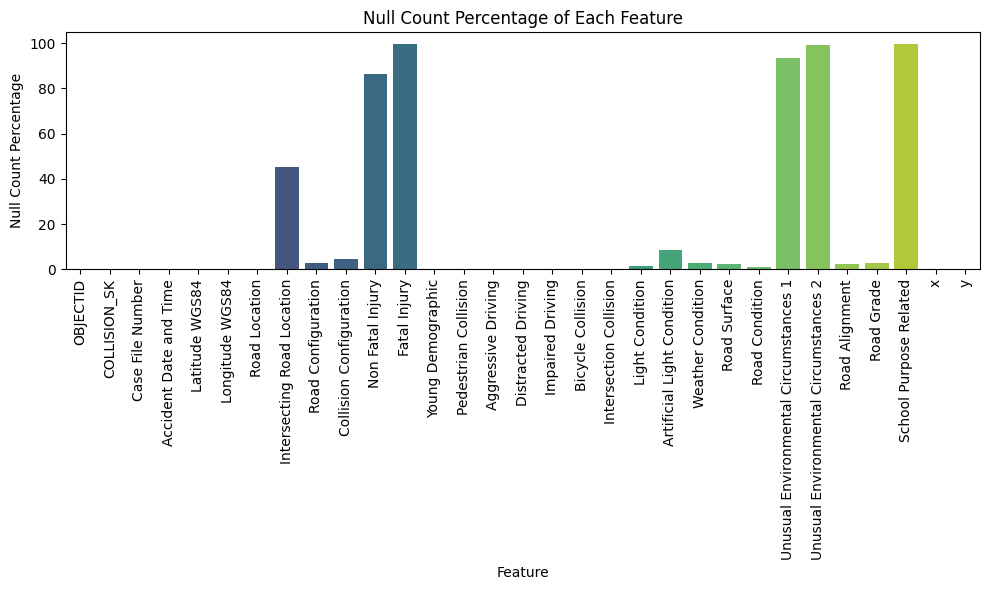

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of null values for each feature
null_percentage = report['Missing Percentage']

# Create a bar plot of null percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=report['Column Name'], y=null_percentage, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Null Count Percentage')
plt.title('Null Count Percentage of Each Feature')
plt.tight_layout()
plt.show()


In [ ]:
report.to_csv('quality_report.csv', index=False)

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


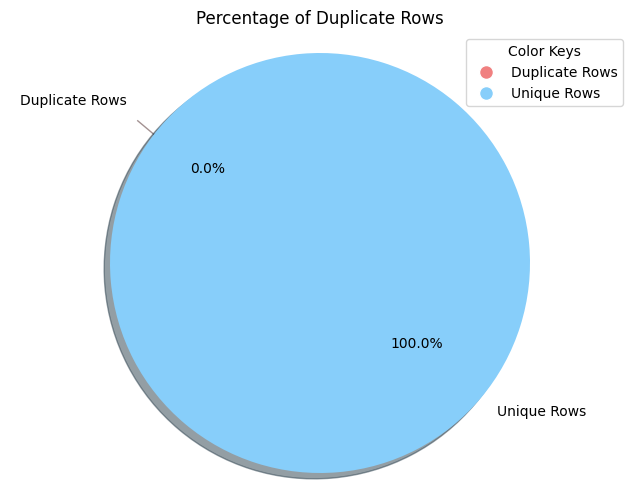

In [ ]:
import matplotlib.pyplot as plt

# Calculate the percentage of duplicate rows
total_rows = len(df)
duplicate_percentage = (duplicate_count / total_rows) * 100
unique_percentage = 100 - duplicate_percentage

# Create a pie chart
labels = ['Duplicate Rows', 'Unique Rows']
sizes = [duplicate_percentage, unique_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a legend with color keys
legend_handles = []
for color, label in zip(colors, labels):
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10))

plt.legend(handles=legend_handles, loc='upper right', title="Color Keys")

plt.title('Percentage of Duplicate Rows')
plt.show()


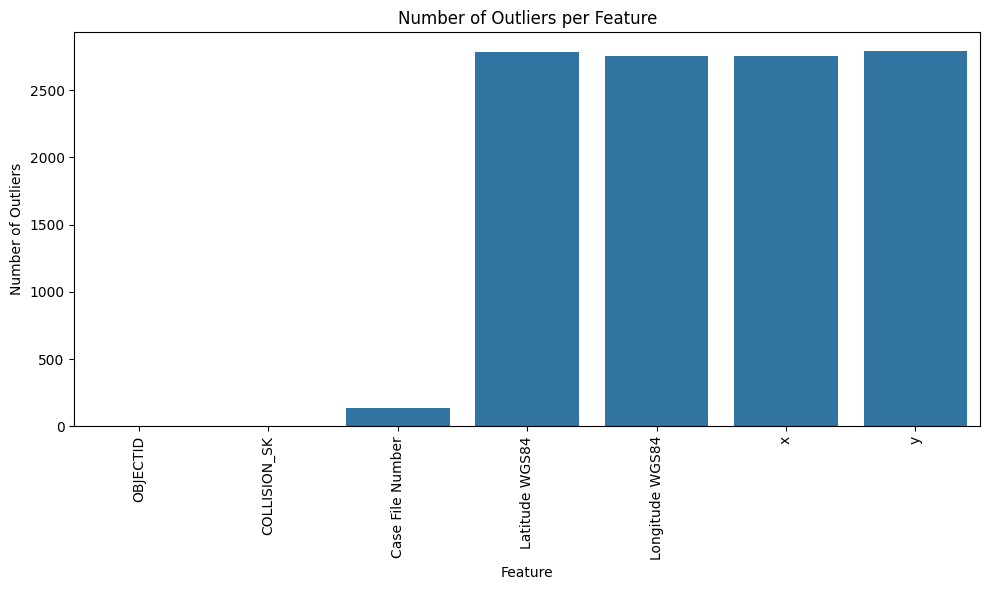

In [ ]:
# prompt: plot the number of outliers

# Assuming 'df' DataFrame from the previous code is available.

# Calculate the number of outliers for each numerical column
outlier_counts = {}
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)

# Create a bar plot of outlier counts
plt.figure(figsize=(10, 6))
sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()))
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers per Feature')
plt.tight_layout()
plt.show()


### Single instance of the raw data

In [ ]:
# Display a single data instance (first row) of the DataFrame 'df'
df.iloc[0]

,0
OBJECTID,1
COLLISION_SK,94351
Case File Number,162686
Accident Date and Time,11/29/2024 11:38:00 AM
Latitude WGS84,44.719783
Longitude WGS84,-63.637095
Road Location,BEDFORD BYPS
Intersecting Road Location,WINDMILL RD
Road Configuration,Non-intersection
Collision Configuration,Single vehicle - hit a moving or stationary ob...


# Data Cleaning

In [ ]:
# Drop columns with excessive missing values (>30% missing)
columns_to_drop = ["Unusual Environmental Circumstances 1", "Unusual Environmental Circumstances 2",
                   "School Purpose Related", "Fatal Injury", "Non Fatal Injury"]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Drop rows with missing 'Accident Date and Time'
df.dropna(subset=["Accident Date and Time"], inplace=True)

In [ ]:
# Fill missing values in categorical columns with mode
categorical_cols = ["Road Configuration", "Collision Configuration",
                    "Light Condition", "Artificial Light Condition",
                    "Road Surface", "Road Alignment", "Road Grade"]

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-52-709011f975c1>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Set "Intersecting Road Location" to NaN where "Road Configuration" is NOT an intersection
df.loc[df["Road Configuration"] != "Intersection - two or more public roads", "Intersecting Road Location"] = None

### Date and Time processing

In [ ]:
# Split 'Accident Date and Time' into separate 'Date' and 'Time' columns
df["Date"] = pd.to_datetime(df["Accident Date and Time"]).dt.date
df["Time"] = pd.to_datetime(df["Accident Date and Time"]).dt.time

df.drop(columns=["Accident Date and Time"], inplace=True)

In [ ]:
# Extract 'Month' and 'Day' from the 'Date' column
df["Month"] = pd.to_datetime(df["Date"]).dt.month
df["Day"] = pd.to_datetime(df["Date"]).dt.day
df["Day of the Week"] = pd.to_datetime(df["Date"]).dt.day_name()

In [ ]:
# Function to fill missing values with the mode of that month
def impute_mode_by_month(df, column):
    return df[column].fillna(df.groupby("Month")[column].transform(lambda x: x.mode()[0] if not x.mode().empty else None))

# Apply imputation for weather and road condition columns
df["Weather Condition"] = impute_mode_by_month(df, "Weather Condition")
df["Road Condition"] = impute_mode_by_month(df, "Road Condition")

In [ ]:
# Extract hour from time
df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.hour

# Define bins for 2-hour intervals: [0, 2, 4, ..., 24]
bins = list(range(0, 25, 2))

# Define slot labels as "0-2", "2-4", ..., "22-24"
labels = [f"{i}-{i+2}" for i in bins[:-1]]

# Bin time into slots
df["Time Slot"] = pd.cut(df["Hour"], bins=bins, labels=labels, right=False)

<ipython-input-58-be3ad8f63de1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_percentage_after_cleaning.index, y=null_percentage_after_cleaning.values, palette='viridis')


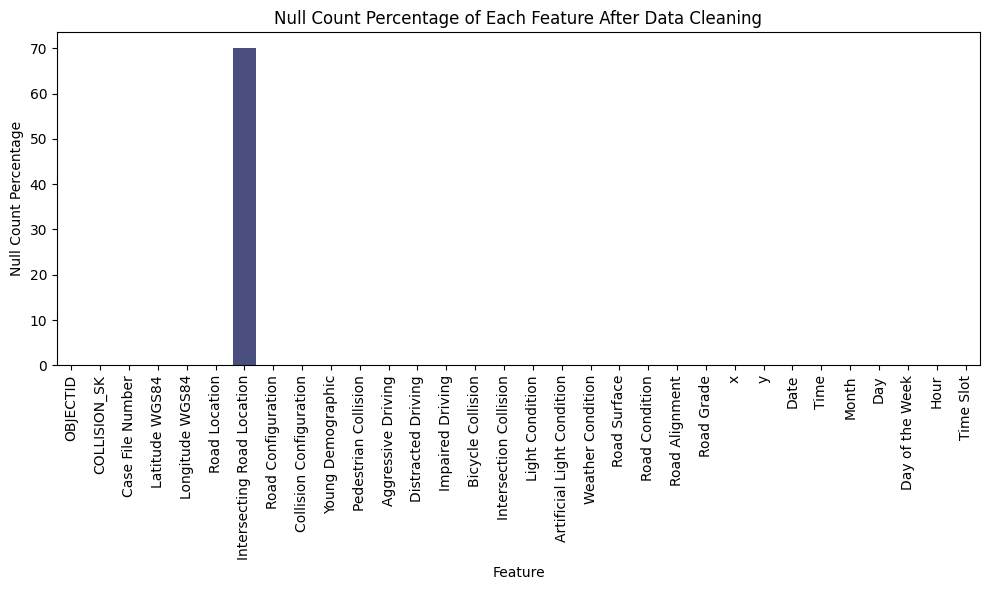

In [ ]:
# Null count of each feature after data cleaning

null_percentage_after_cleaning = df.isnull().sum() / len(df) * 100

# Create a bar plot of null percentages after cleaning
plt.figure(figsize=(10, 6))
sns.barplot(x=null_percentage_after_cleaning.index, y=null_percentage_after_cleaning.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Null Count Percentage')
plt.title('Null Count Percentage of Each Feature After Data Cleaning')
plt.tight_layout()
plt.show()


# Data Exploration #Visualization

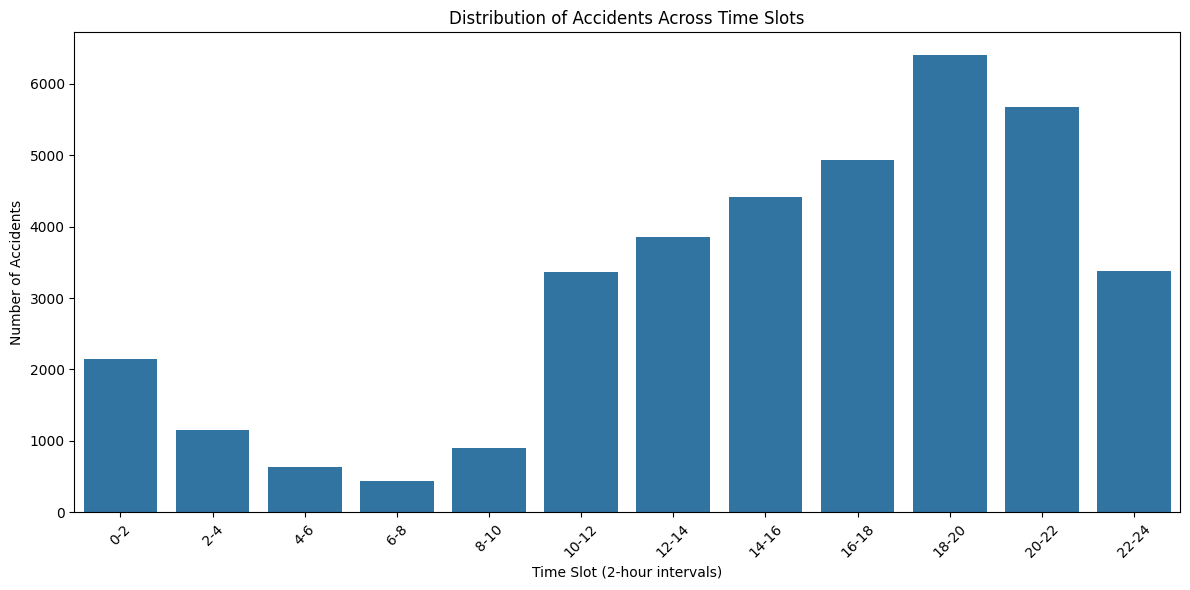

In [ ]:
# Count the occurrences of each time slot
time_slot_counts = df['Time Slot'].value_counts()

# Create a bar plot of time slot counts
plt.figure(figsize=(12, 6))
sns.barplot(x=time_slot_counts.index, y=time_slot_counts.values)
plt.xlabel('Time Slot (2-hour intervals)')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents Across Time Slots')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


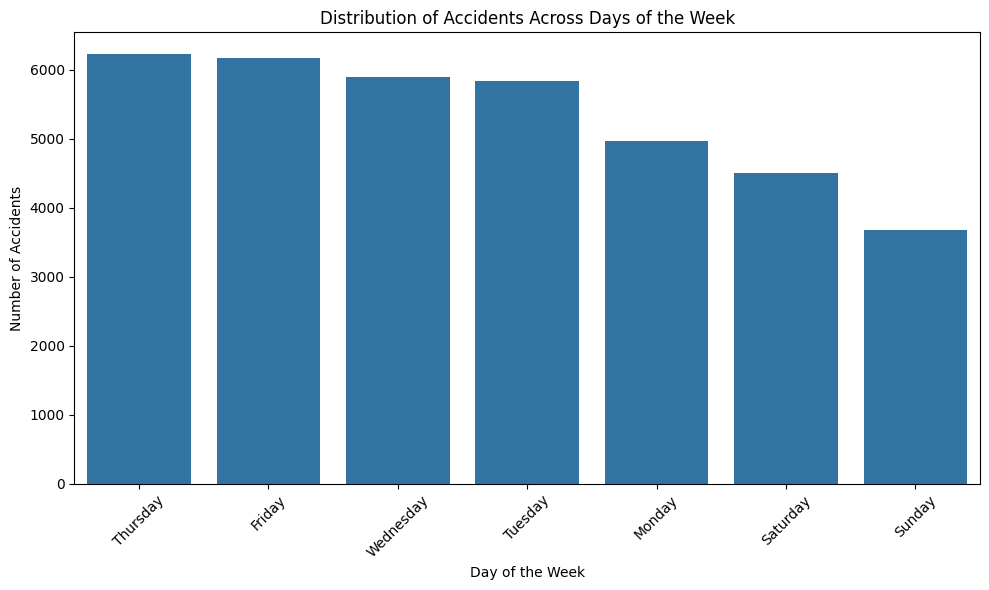

In [ ]:
# Count the occurrences of each day of the week
day_of_week_counts = df['Day of the Week'].value_counts()

# Create a bar plot of day of the week counts
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents Across Days of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-61-15c59f60c150>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_by_day_time = df.groupby(['Day of the Week', 'Time Slot']).size().reset_index(name='Accident Count')


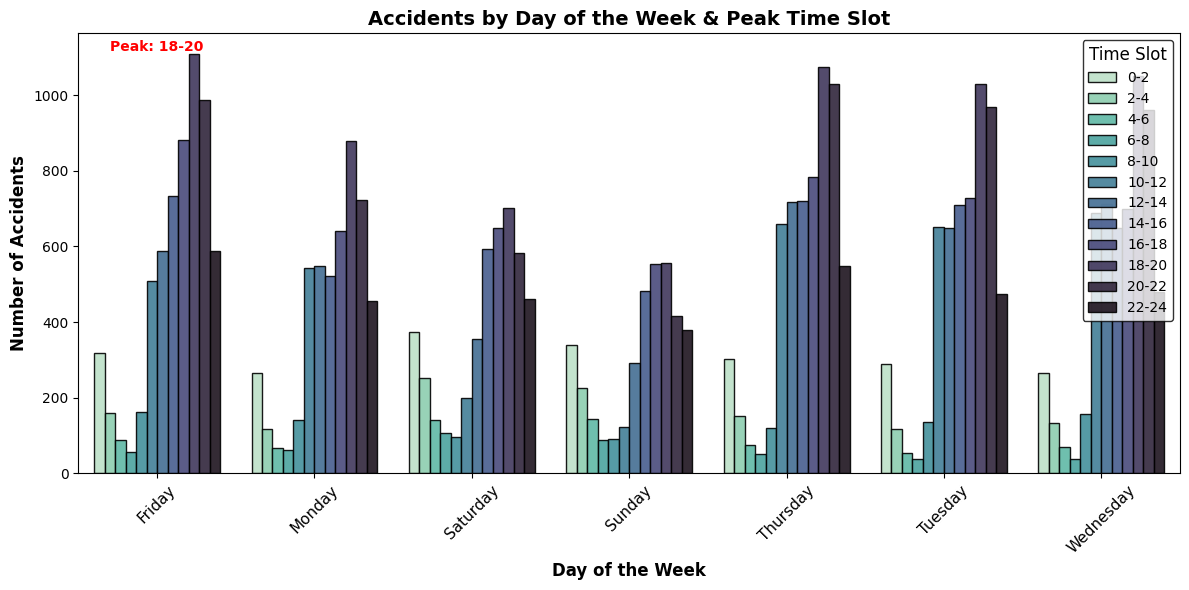

In [ ]:
# Group data by day of the week and time slot, then count accidents
accidents_by_day_time = df.groupby(['Day of the Week', 'Time Slot']).size().reset_index(name='Accident Count')

# Find the maximum number of accidents
max_accidents = accidents_by_day_time['Accident Count'].max()

# Find the day(s) and time slot(s) with the maximum number of accidents
max_accidents_rows = accidents_by_day_time[accidents_by_day_time['Accident Count'] == max_accidents]

# Define a professional color palette
palette = sns.color_palette("mako_r", n_colors=len(df["Time Slot"].unique()))  # Reverse mako for a clean gradient

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Day of the Week', y='Accident Count', hue='Time Slot', data=accidents_by_day_time, palette=palette, edgecolor="black", alpha=0.9)

# Customize labels and title
plt.xlabel('Day of the Week', fontsize=12, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=12, fontweight='bold')
plt.title('Accidents by Day of the Week & Peak Time Slot', fontsize=14, fontweight='bold')

# Improve x-tick rotation for better readability
plt.xticks(rotation=45, fontsize=11)

# Highlight the maximum accident count with annotations
for index, row in max_accidents_rows.iterrows():
    plt.text(
        x=row['Day of the Week'],
        y=row['Accident Count'] + 2,
        s=f"Peak: {row['Time Slot']}",
        ha='center', va='bottom',
        fontsize=10, color='red', fontweight='bold'
    )

# Improve legend positioning and formatting
plt.legend(title="Time Slot", title_fontsize="12", loc="upper right", fontsize=10, frameon=True, edgecolor="black")

plt.tight_layout()
plt.show()


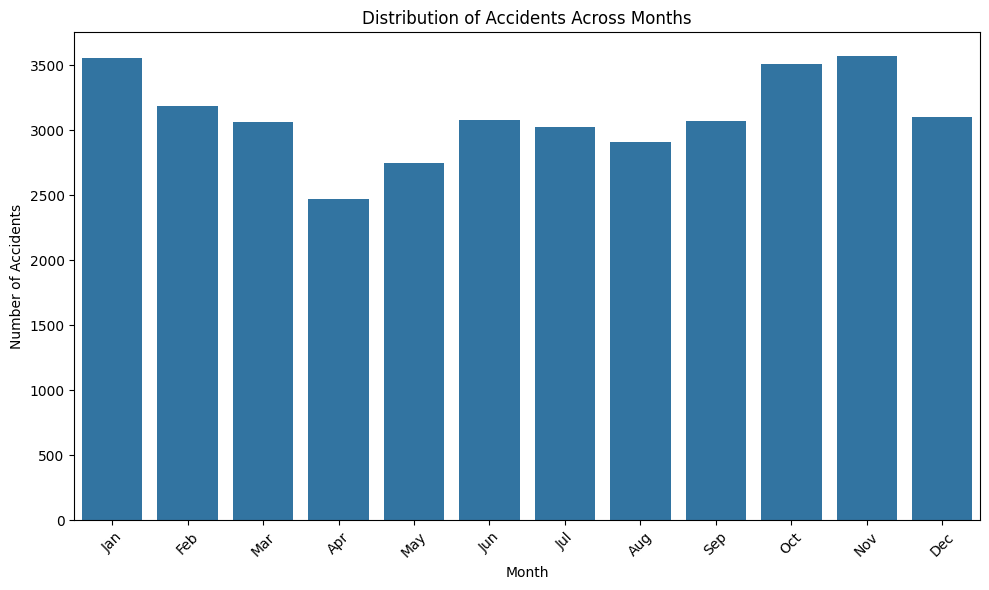

In [ ]:
# Count the occurrences of each month
month_counts = df["Month"].value_counts().sort_index()

# Define month labels
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Create a bar plot of month counts
plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values)

# Set axis labels and title
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.title("Distribution of Accidents Across Months")

# Update x-ticks with month names
plt.xticks(ticks=range(12), labels=month_labels, rotation=45)

plt.tight_layout()
plt.show()



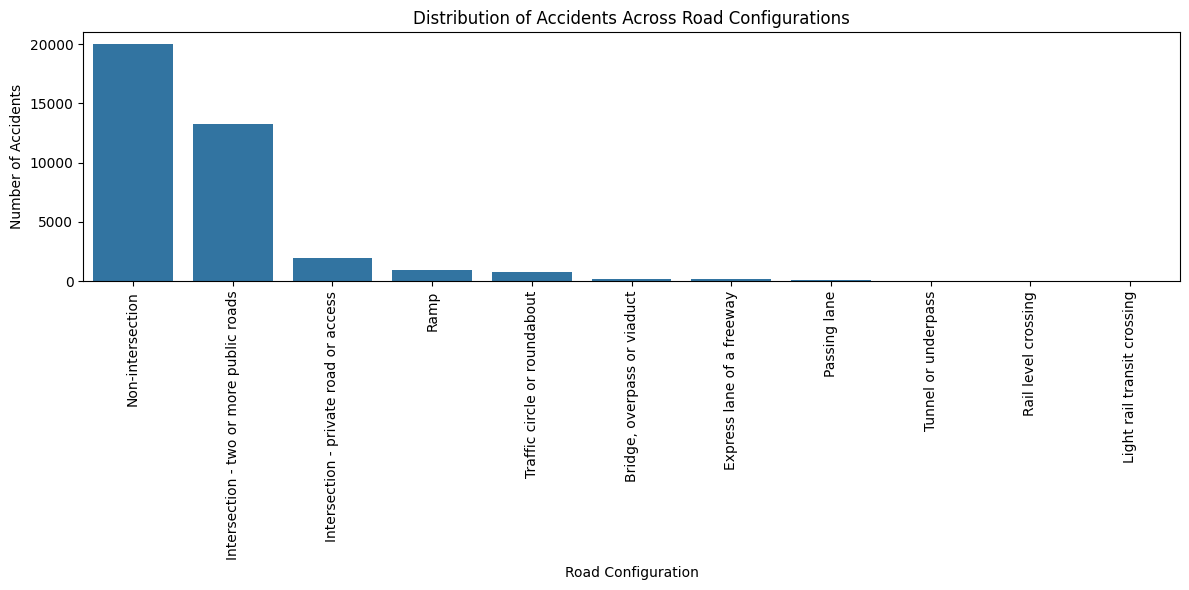

In [ ]:
# Count the occurrences of each road configuration
road_config_counts = df['Road Configuration'].value_counts()

# Create a bar plot of road configuration counts
plt.figure(figsize=(12, 6))
sns.barplot(x=road_config_counts.index, y=road_config_counts.values)
plt.xlabel('Road Configuration')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents Across Road Configurations')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Geo-spatial clustering

In [ ]:
coords = df[["Latitude WGS84", "Longitude WGS84"]].dropna()

In [ ]:
from sklearn.cluster import DBSCAN

# Convert coordinates to numpy array
X = np.radians(coords)  # Convert to radians for haversine metric

# DBSCAN parameters (adjust based on your data)
eps = 0.2 / 6371.0  # ~200 meters (Earth's radius in km)
min_samples = 10  # Minimum accidents to form a cluster

# Fit DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, metric='haversine').fit(X)

# Add cluster labels to the dataframe
df['Cluster'] = db.labels_

# Count clusters
n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print(f"Found {n_clusters} clusters")

Found 234 clusters


In [ ]:
import folium

# Create a map centered on the mean location
map_center = [df["Latitude WGS84"].mean(), df["Longitude WGS84"].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Color each cluster
colors = ['red', 'blue', 'green', 'purple', 'orange']

for idx, row in df.iterrows():
    if row['Cluster'] != -1:  # Skip noise
        folium.CircleMarker(
            location=[row["Latitude WGS84"], row["Longitude WGS84"]],
            radius=5,
            color=colors[row['Cluster'] % len(colors)],
            fill=True,
            popup=f"Cluster {row['Cluster']}"
        ).add_to(m)

m.save("accident_clusters.html")

### Analyse clusters

In [ ]:
# Get cluster counts in ascending order
cluster_counts = df['Cluster'].value_counts().sort_values(ascending=True)

# Display the results
print("Cluster Counts (Ascending Order):")
print(cluster_counts)

Cluster Counts (Ascending Order):
Cluster
 230        5
 227        5
 226        7
 232        7
 225        8
        ...  
 15       580
 1       1015
-1       4612
 4       5482
 2      14799
Name: count, Length: 235, dtype: int64


In [ ]:
# Group by cluster and count accidents
cluster_stats = df.groupby("Cluster").size().reset_index(name="Accident Count")

# Filter non-noise clusters
hotspots = cluster_stats[cluster_stats["Cluster"] != -1].sort_values("Accident Count", ascending=False)
print(hotspots)

     Cluster  Accident Count
3          2           14799
5          4            5482
2          1            1015
16        15             580
7          6             562
..       ...             ...
226      225               8
233      232               7
227      226               7
228      227               5
231      230               5

[234 rows x 2 columns]


# Data Preprocessing for Regression

P(Accident/Condition)=
P(Condition)/(P(Condition/Accident)⋅P(Accident))
​



In [ ]:
df.columns

Index(['OBJECTID', 'COLLISION_SK', 'Case File Number', 'Latitude WGS84',
       'Longitude WGS84', 'Road Location', 'Intersecting Road Location',
       'Road Configuration', 'Collision Configuration', 'Young Demographic',
       'Pedestrian Collision', 'Aggressive Driving', 'Distracted Driving',
       'Impaired Driving', 'Bicycle Collision', 'Intersection Collision',
       'Light Condition', 'Artificial Light Condition', 'Weather Condition',
       'Road Surface', 'Road Condition', 'Road Alignment', 'Road Grade', 'x',
       'y', 'Date', 'Time', 'Month', 'Day', 'Day of the Week', 'Hour',
       'Time Slot', 'Cluster'],
      dtype='object')

In [ ]:
prediction_df = df[["Weather Condition","Month","Day of the Week","Time Slot","Cluster"]]

In [ ]:
#Data after clustering
prediction_df.head()

,Weather Condition,Month,Day of the Week,Time Slot,Cluster
0,Clear,11,Friday,10-12,0
1,Clear,11,Friday,20-22,1
2,Clear,11,Friday,20-22,2
3,Clear,11,Saturday,0-2,6
4,Overcast or cloudy,11,Friday,12-14,2


In [ ]:
# Count total duplicate rows (keeping first occurrence as non-duplicate)
duplicates = prediction_df[prediction_df.duplicated(keep=False)]  # keep=False marks all duplicates
num_overlapping = len(duplicates)

print(f"Total overlapping instances: {num_overlapping}")

print(f"total length :{len(df)}")

Total overlapping instances: 24700
total length :37310


In [ ]:
# Step 1: Remove noise points (Cluster = -1)
prediction_df = prediction_df[prediction_df['Cluster'] != -1].copy()

# Step 2: Group by all features and count OCCURRING combinations only
grouped_df = prediction_df.groupby([
    "Weather Condition",
    "Month",
    "Day of the Week",
    "Time Slot",
    "Cluster"
], observed=True).size().reset_index(name='Count')

# Step 3: Sort by Count (descending) to see most common patterns
grouped_df = grouped_df.sort_values('Count', ascending=False)

# Result preview
print(f"Found {len(grouped_df)} unique non-noise patterns")
print(grouped_df.head())

Found 15468 unique non-noise patterns
     Weather Condition  Month Day of the Week Time Slot  Cluster  Count
6536             Clear     10          Friday     18-20        2     39
4880             Clear      7       Wednesday     18-20        2     39
5630             Clear      8       Wednesday     18-20        2     37
7147             Clear     10         Tuesday     18-20        2     37
6675             Clear     10          Monday     18-20        2     36


In [ ]:
len(prediction_df)

32698

In [ ]:
df.head()

,OBJECTID,COLLISION_SK,Case File Number,Latitude WGS84,Longitude WGS84,Road Location,Intersecting Road Location,Road Configuration,Collision Configuration,Young Demographic,...,x,y,Date,Time,Month,Day,Day of the Week,Hour,Time Slot,Cluster
0,1,94351,162686,44.719783,-63.637095,BEDFORD BYPS,None,Non-intersection,Single vehicle - hit a moving or stationary ob...,N,...,-7.084049e+06,5.577516e+06,2024-11-29,11:38:00,11,29,Friday,11,10-12,0
1,2,94528,166309,44.774726,-63.693915,SACKVILLE DR,IRENE AVE,Intersection - two or more public roads,Multiple vehicle - one crossing path of other ...,N,...,-7.090374e+06,5.586128e+06,2024-11-29,21:30:00,11,29,Friday,21,20-22,1
2,3,94543,162924,44.660348,-63.627539,JOSEPH HOW DR,DUTCH VILLAGE RD,Intersection - two or more public roads,Multiple vehicle - rear end,Y,...,-7.082985e+06,5.568209e+06,2024-11-29,20:03:00,11,29,Friday,20,20-22,2
3,4,94798,171470,44.708645,-63.676562,34 WINDSTONE CL,None,Non-intersection,Multiple vehicle - hit parked vehicle,N,...,-7.088442e+06,5.575771e+06,2024-11-30,00:30:00,11,30,Saturday,0,0-2,6
4,5,94362,162719,44.630331,-63.619701,BRIGHTON AVE,MARGATE DR,Intersection - two or more public roads,Multiple vehicle - hit parked vehicle,N,...,-7.082112e+06,5.563513e+06,2024-11-29,13:02:00,11,29,Friday,13,12-14,2


In [ ]:
# Convert 'Date' column to datetime format if not already
df['Date'] = pd.to_datetime(df['Date'])

# Get min and max dates
min_date = df['Date'].min()
max_date = df['Date'].max()

print("Min Date:", min_date)
print("Max Date:", max_date)


Min Date: 2018-01-01 00:00:00
Max Date: 2024-11-30 00:00:00


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
grouped_df['Normalized_Count'] = scaler.fit_transform(grouped_df[['Count']])


In [ ]:
grouped_df.head()

,Weather Condition,Month,Day of the Week,Time Slot,Cluster,Count,Normalized_Count
6536,Clear,10,Friday,18-20,2,39,1.000000
4880,Clear,7,Wednesday,18-20,2,39,1.000000
5630,Clear,8,Wednesday,18-20,2,37,0.947368
7147,Clear,10,Tuesday,18-20,2,37,0.947368
6675,Clear,10,Monday,18-20,2,36,0.921053


In [ ]:
all_grouped_data = grouped_df.apply(lambda x: x)
all_grouped_data.reset_index(drop=True).to_csv("all_accident_data_grouped.csv", index=False)

# Regression

## Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

label_encoded_df = grouped_df.copy()

# Encode categorical variables
label_encoders = {}
categorical_cols = ["Weather Condition", "Day of the Week", "Time Slot", "Cluster", "Month"]

for col in categorical_cols:
    le = LabelEncoder()
    label_encoded_df[col] = le.fit_transform(grouped_df[col])
    label_encoders[col] = le  # Store encoders for later use

# Define features (X) and target variable (y)
X = label_encoded_df[["Weather Condition", "Month", "Day of the Week", "Time Slot", "Cluster"]]
y = label_encoded_df["Normalized_Count"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.0014
R² Score: 0.8556


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 0.0161
Root Mean Squared Error (RMSE): 0.0370


## GradientBoosting regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Train the GradientBoosting model
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = model_gb.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Mean Squared Error: {mse_gb:.4f}")
print(f"Gradient Boosting R² Score: {r2_gb:.4f}")

Gradient Boosting Mean Squared Error: 0.0030
Gradient Boosting R² Score: 0.6861


In [ ]:
mae = mean_absolute_error(y_test, y_pred_gb)
rmse = np.sqrt(mse_gb)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 0.0236
Root Mean Squared Error (RMSE): 0.0546


## XGB

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the XGBoost model
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb:.4f}")
print(f"XGBoost R² Score: {r2_xgb:.4f}")


XGBoost Mean Squared Error: 0.0022
XGBoost R² Score: 0.7723


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Use the best estimator
best_xgb_model = grid_search.best_estimator_

# Train the best model
best_xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error (Test Set): {mse_xgb:.4f}")
print(f"XGBoost R² Score (Test Set): {r2_xgb:.4f}")

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive and calculate average MSE
cv_mse = -np.mean(cv_scores)

print(f"Cross-Validation Mean Squared Error: {cv_mse:.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}
XGBoost Mean Squared Error (Test Set): 0.0014
XGBoost R² Score (Test Set): 0.8549
Cross-Validation Mean Squared Error: 0.0097


In [ ]:
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse_xgb)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 0.0167
Root Mean Squared Error (RMSE): 0.0371


## Neural Network

### Neural network with label encoded features

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network model
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])

model_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
history = model_nn.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)

# Evaluate the model
loss, mae = model_nn.evaluate(X_test, y_test)
print(f"\nNeural Network MAE: {mae:.4f}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.5351 - mae: 0.4793 - val_loss: 0.0098 - val_mae: 0.0644
Epoch 2/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0096 - mae: 0.0638 - val_loss: 0.0120 - val_mae: 0.0793
Epoch 3/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0087 - mae: 0.0594 - val_loss: 0.0069 - val_mae: 0.0476
Epoch 4/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0078 - mae: 0.0534 - val_loss: 0.0074 - val_mae: 0.0524
Epoch 5/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0114 - mae: 0.0601 - val_loss: 0.0065 - val_mae: 0.0438
Epoch 6/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0324 - mae: 0.0749 - val_loss: 0.0072 - val_mae: 0.0533
Epoch 7/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0055 - mae: 0.0427 - val_loss: 0.0059 - val_mae: 0.0420
Epoch 8/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0128 - mae: 0.0632 - val_loss: 0.0067 - val_mae: 0.0518
Epoch 9/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Get predictions from neural network
y_pred_nn = model_nn.predict(X_test).flatten()  # Flatten if output is 2D

# Calculate metrics
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mape_nn = mean_absolute_percentage_error(y_test, y_pred_nn)

# Print results
print(f"\n🔍 Neural Network Evaluation Metrics:")
print(f"MAE   : {mae_nn:.4f}")
print(f"MSE   : {mse_nn:.4f}")
print(f"RMSE  : {rmse_nn:.4f}")
print(f"R²    : {r2_nn:.4f}")
print(f"MAPE  : {mape_nn:.4f}")


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

🔍 Neural Network Evaluation Metrics:
MAE   : 0.0268
MSE   : 0.0032
RMSE  : 0.0564
R²    : 0.6644
MAPE  : 51700225121377.4922


### Neural network with one-hot encoded features

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

# One-hot encode features (no scaling)
X_nn = pd.get_dummies(grouped_df[["Weather Condition", "Month", "Day of the Week", "Time Slot", "Cluster"]])
X_nn = X_nn.astype('float32')
y_nn = grouped_df["Normalized_Count"].astype('float32')

# Train-test split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)


In [ ]:
# Build and train the NN (no scaling)
model_nn = Sequential([
    Input(shape=(X_train_nn.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Fit model
model_nn.fit(X_train_nn, y_train_nn, validation_split=0.2, epochs=100, batch_size=16,
             callbacks=[EarlyStopping(patience=10, restore_best_weights=True)], verbose=1)

Epoch 1/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.2212 - mae: 0.3399 - val_loss: 0.0062 - val_mae: 0.0436
Epoch 2/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0059 - mae: 0.0459 - val_loss: 0.0061 - val_mae: 0.0446
Epoch 3/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0050 - mae: 0.0421 - val_loss: 0.0042 - val_mae: 0.0347
Epoch 4/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0051 - mae: 0.0434 - val_loss: 0.0136 - val_mae: 0.0872
Epoch 5/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0246 - mae: 0.0758 - val_loss: 0.0049 - val_mae: 0.0438
Epoch 6/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0054 - mae: 0.0444 - val_loss: 0.0077 - val_mae: 0.0636
Epoch 7/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0869 - mae: 0.1236 - val_loss: 0.0034 - val_mae: 0.0281
Epoch 8/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0028 - mae: 0.0300 - val_loss: 0.0046 - val_mae: 0.0473
Epoch 9/100
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/

In [ ]:
# Evaluate on test set
loss, mae = model_nn.evaluate(X_test_nn, y_test_nn, verbose=0)
print(f"\nNeural Network Evaluation:")
print(f"MAE : {mae:.4f}")
print(f"MSE : {loss:.4f}")

# Predict on test set
y_pred_nn = model_nn.predict(X_test_nn).flatten()

# Calculate R² score
r2 = r2_score(y_test_nn, y_pred_nn)

# accuracy = percentage of predictions within a tolerance
tolerance = 0.05  # e.g., within ±0.05 of true value
within_tolerance = np.abs(y_pred_nn - y_test_nn.values) <= tolerance
accuracy = np.mean(within_tolerance)

# Print
print(f"R² Score       : {r2:.4f}")
print(f"Custom Accuracy (±{tolerance}) : {accuracy * 100:.2f}%")


Neural Network Evaluation:
MAE : 0.0227
MSE : 0.0020
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R² Score       : 0.7859
Custom Accuracy (±0.05) : 89.30%


## Save the Random forest Regressor Model

In [ ]:
#save the model
import joblib
joblib.dump(model, "random_forest_accident_model.pkl")

['random_forest_accident_model.pkl']

### View the Categories in each feature :

In [ ]:
print(grouped_df.dtypes)

Weather Condition      object
Month                   int32
Day of the Week        object
Time Slot            category
Cluster                 int64
Count                   int64
Normalized_Count      float64
dtype: object


## Test with User input :

In [ ]:
import joblib

# Define mapping dictionaries (must match training)
weather_mapping = {'Clear': 0, 'Rain': 1, 'Snow': 2, 'Fog': 3}
day_mapping = {'Monday': 1, 'Tuesday': 5, 'Wednesday': 6, 'Thursday': 4,
               'Friday': 0, 'Saturday': 2, 'Sunday': 3}
time_mapping = {'00-02': 0, '02-04': 6, '04-06': 9, '06-08': 10, '08-10': 11,
                '10-12': 1, '12-14': 2, '14-16': 3, '16-18': 4, '18-20': 5,
                '20-22': 7, '22-24': 8}
month_mapping = {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6,
                 '8': 7, '9': 8, '10': 9, '11': 10, '12': 11}

# Load your trained model once
rf_model = joblib.load("random_forest_accident_model.pkl")

def predict_accident_risk(user_input):
    try:
        # Create a DataFrame with one row using the same feature names
        input_df = pd.DataFrame([{
            'Weather Condition': weather_mapping[user_input['Weather Condition']],
            'Month': month_mapping[user_input['Month']],
            'Day of the Week': day_mapping[user_input['Day of the Week']],
            'Time Slot': time_mapping[user_input['Time Slot']],
            'Cluster': user_input['Cluster']
        }])

        # Predict
        predicted_risk = rf_model.predict(input_df)[0]

        print(f"\n🧠 Predicted Accident Risk Probability: {predicted_risk:.4f}")
        return predicted_risk

    except KeyError as e:
        print(f"Invalid input key or value: {e}")
        return None


In [ ]:
user_input = {
    'Weather Condition': 'Clear',
    'Month': '10',
    'Day of the Week': 'Friday',
    'Time Slot': '18-20',
    'Cluster': 2
}

_ = predict_accident_risk(user_input)



🧠 Predicted Accident Risk Probability: 0.8516


# Evaluation Plots

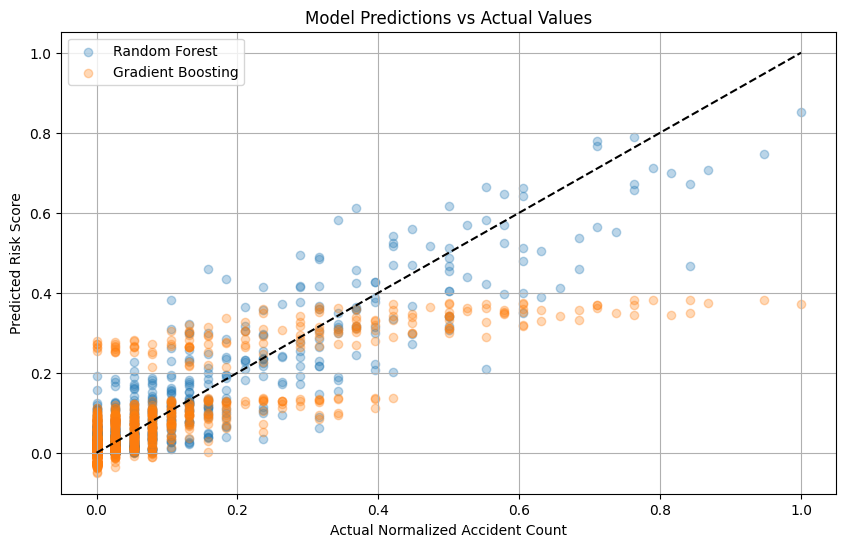

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3, label='Random Forest')
plt.scatter(y_test, y_pred_gb, alpha=0.3, label='Gradient Boosting')
plt.plot([0,1], [0,1], 'k--')  # Perfect prediction line
plt.xlabel('Actual Normalized Accident Count')
plt.ylabel('Predicted Risk Score')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.grid(True)

## 5-fold CV

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Use the same features and target
X = label_encoded_df[["Weather Condition", "Month", "Day of the Week", "Time Slot", "Cluster"]]
y = label_encoded_df["Normalized_Count"]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# -------- Random Forest --------
rf_mae = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
rf_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')

# -------- Gradient Boosting --------
gb_mae = cross_val_score(model_gb, X, y, cv=kf, scoring='neg_mean_absolute_error')
gb_r2 = cross_val_score(model_gb, X, y, cv=kf, scoring='r2')

# -------- Neural Network --------
def build_nn():
    model_nn = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model_nn.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])
    return model_nn

nn_mae_scores = []
nn_r2_scores = []

for train_idx, val_idx in kf.split(X):
    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    nn_model = build_nn()
    nn_model.fit(X_train_cv, y_train_cv, epochs=50, batch_size=16, verbose=0, callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

    y_pred_nn = nn_model.predict(X_val_cv).flatten()
    nn_mae_scores.append(mean_absolute_error(y_val_cv, y_pred_nn))
    nn_r2_scores.append(r2_score(y_val_cv, y_pred_nn))

# -------- Results --------
print("Random Forest CV:")
print(f"MAE: {-np.mean(rf_mae):.4f} ± {np.std(rf_mae):.4f}")
print(f"R² : {np.mean(rf_r2):.4f} ± {np.std(rf_r2):.4f}")

print("\n Gradient Boosting CV:")
print(f"MAE: {-np.mean(gb_mae):.4f} ± {np.std(gb_mae):.4f}")
print(f"R² : {np.mean(gb_r2):.4f} ± {np.std(gb_r2):.4f}")

print("\n Neural Network CV:")
print(f"MAE: {np.mean(nn_mae_scores):.4f} ± {np.std(nn_mae_scores):.4f}")
print(f"R² : {np.mean(nn_r2_scores):.4f} ± {np.std(nn_r2_scores):.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Random Forest CV:
MAE: 0.0160 ± 0.0002
R² : 0.8378 ± 0.0112

 Gradient Boosting CV:
MAE: 0.0226 ± 0.0006
R² : 0.6957 ± 0.0146

 Neural Network CV:
MAE: 0.0242 ± 0.0025
R² : 0.6378 ± 0.0407


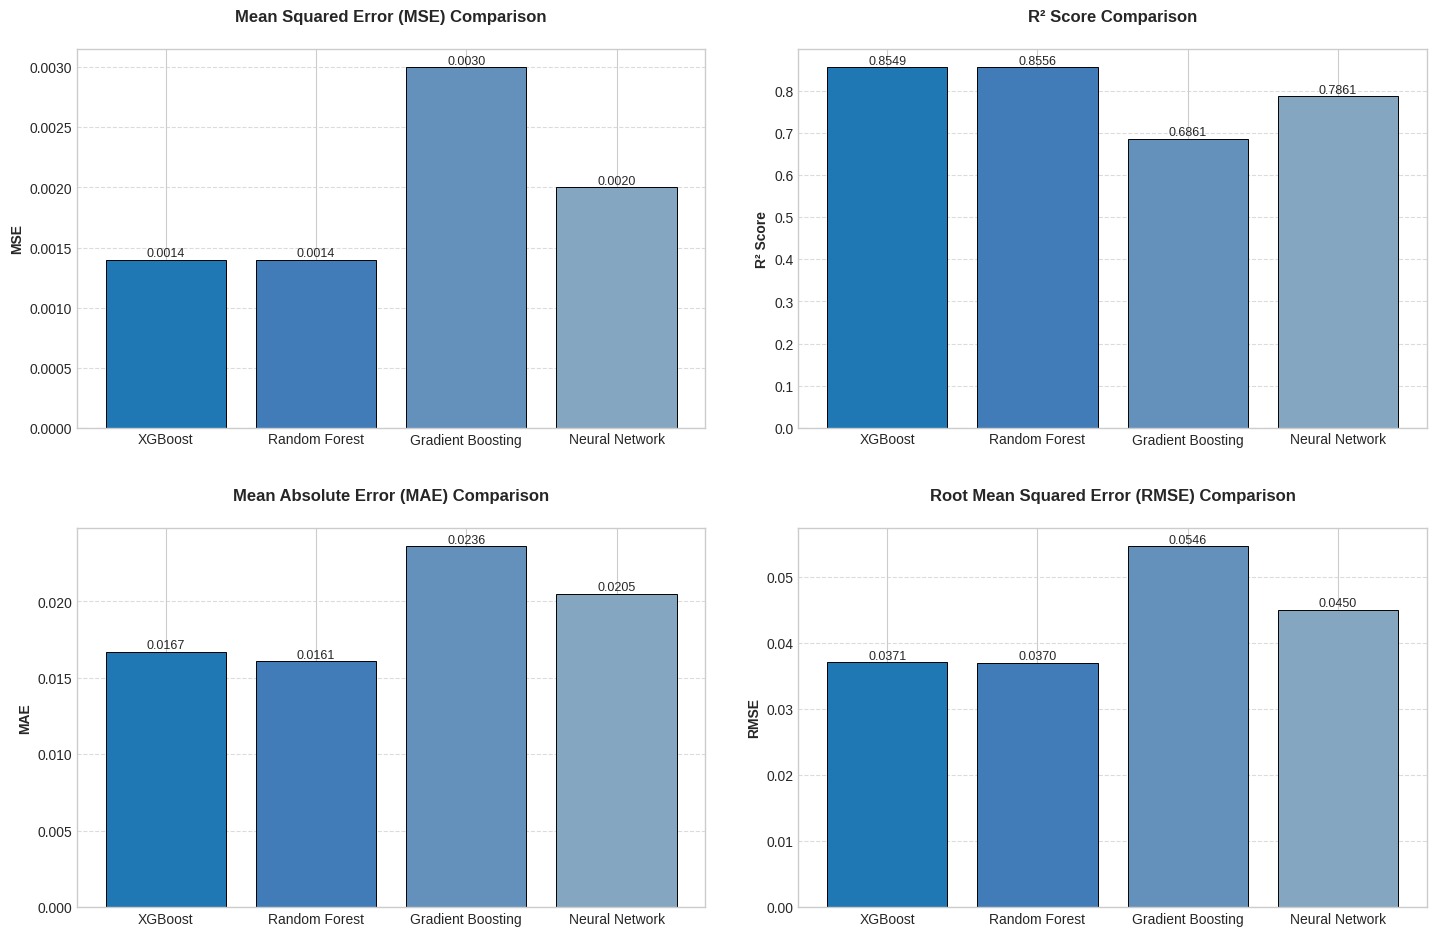

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set the classic professional style
plt.style.use('seaborn-v0_8-whitegrid')  # Clean white background with grid

# Create the DataFrame
data = {
    'Model': ['XGBoost', 'Random Forest', 'Gradient Boosting', 'Neural Network'],
    'MSE': [0.0014, 0.0014, 0.0030, 0.0020],
    'R² Score': [0.8549, 0.8556, 0.6861, 0.7861],
    'MAE': [0.0167, 0.0161, 0.0236, 0.0205],
    'RMSE': [0.0371, 0.0370, 0.0546, 0.0450]
}
df = pd.DataFrame(data)

# Classic professional color palette (blue tones)
colors = ['#1f77b4', '#417cb8', '#6391bc', '#85a6c0']

# Set up the figure and subplots
plt.figure(figsize=(15, 10))

# Plot MSE
plt.subplot(2, 2, 1)
bars = plt.bar(df['Model'], df['MSE'], color=colors, edgecolor='black', linewidth=0.7)
plt.title('Mean Squared Error (MSE) Comparison', fontweight='bold', pad=20)
plt.ylabel('MSE', fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# Plot R² Score
plt.subplot(2, 2, 2)
bars = plt.bar(df['Model'], df['R² Score'], color=colors, edgecolor='black', linewidth=0.7)
plt.title('R² Score Comparison', fontweight='bold', pad=20)
plt.ylabel('R² Score', fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# Plot MAE
plt.subplot(2, 2, 3)
bars = plt.bar(df['Model'], df['MAE'], color=colors, edgecolor='black', linewidth=0.7)
plt.title('Mean Absolute Error (MAE) Comparison', fontweight='bold', pad=20)
plt.ylabel('MAE', fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# Plot RMSE
plt.subplot(2, 2, 4)
bars = plt.bar(df['Model'], df['RMSE'], color=colors, edgecolor='black', linewidth=0.7)
plt.title('Root Mean Squared Error (RMSE) Comparison', fontweight='bold', pad=20)
plt.ylabel('RMSE', fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# Adjust layout and display the plot
plt.tight_layout(pad=3.0)
plt.show()

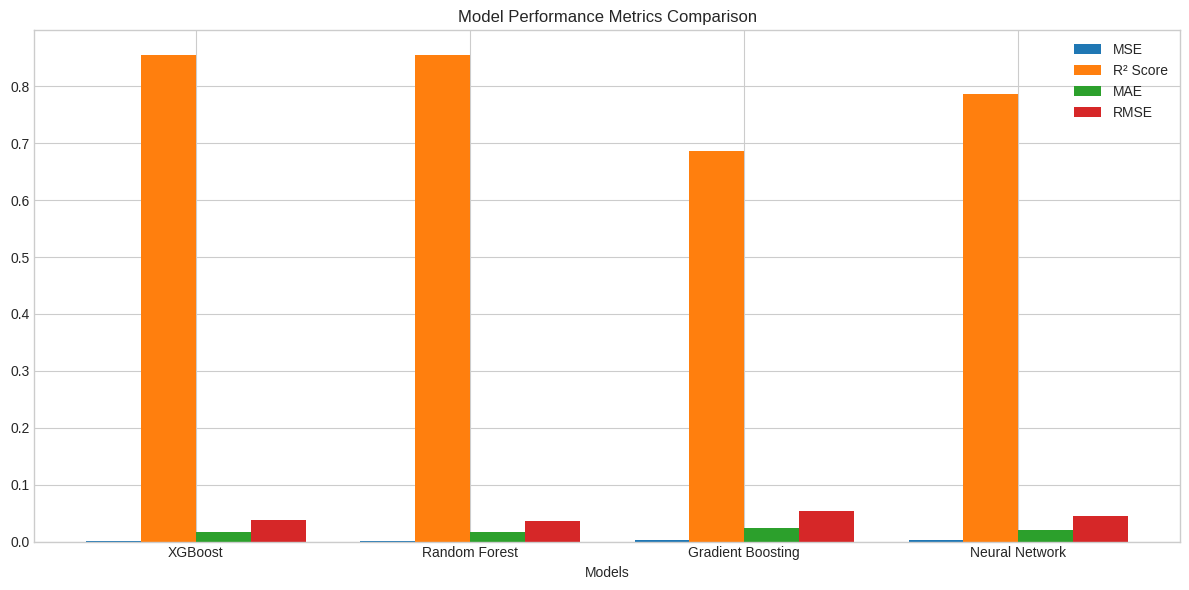

In [ ]:
# Alternative: All metrics in one plot with horizontal labels
plt.figure(figsize=(12, 6))
x = np.arange(len(df['Model']))  # the label locations
width = 0.2  # the width of the bars

plt.bar(x - 1.5*width, df['MSE'], width, label='MSE')
plt.bar(x - 0.5*width, df['R² Score'], width, label='R² Score')
plt.bar(x + 0.5*width, df['MAE'], width, label='MAE')
plt.bar(x + 1.5*width, df['RMSE'], width, label='RMSE')

plt.title('Model Performance Metrics Comparison')
plt.xlabel('Models')
plt.xticks(x, df['Model'], rotation=0)  # Changed to horizontal labels
plt.legend()
plt.tight_layout()
plt.show()

Available styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


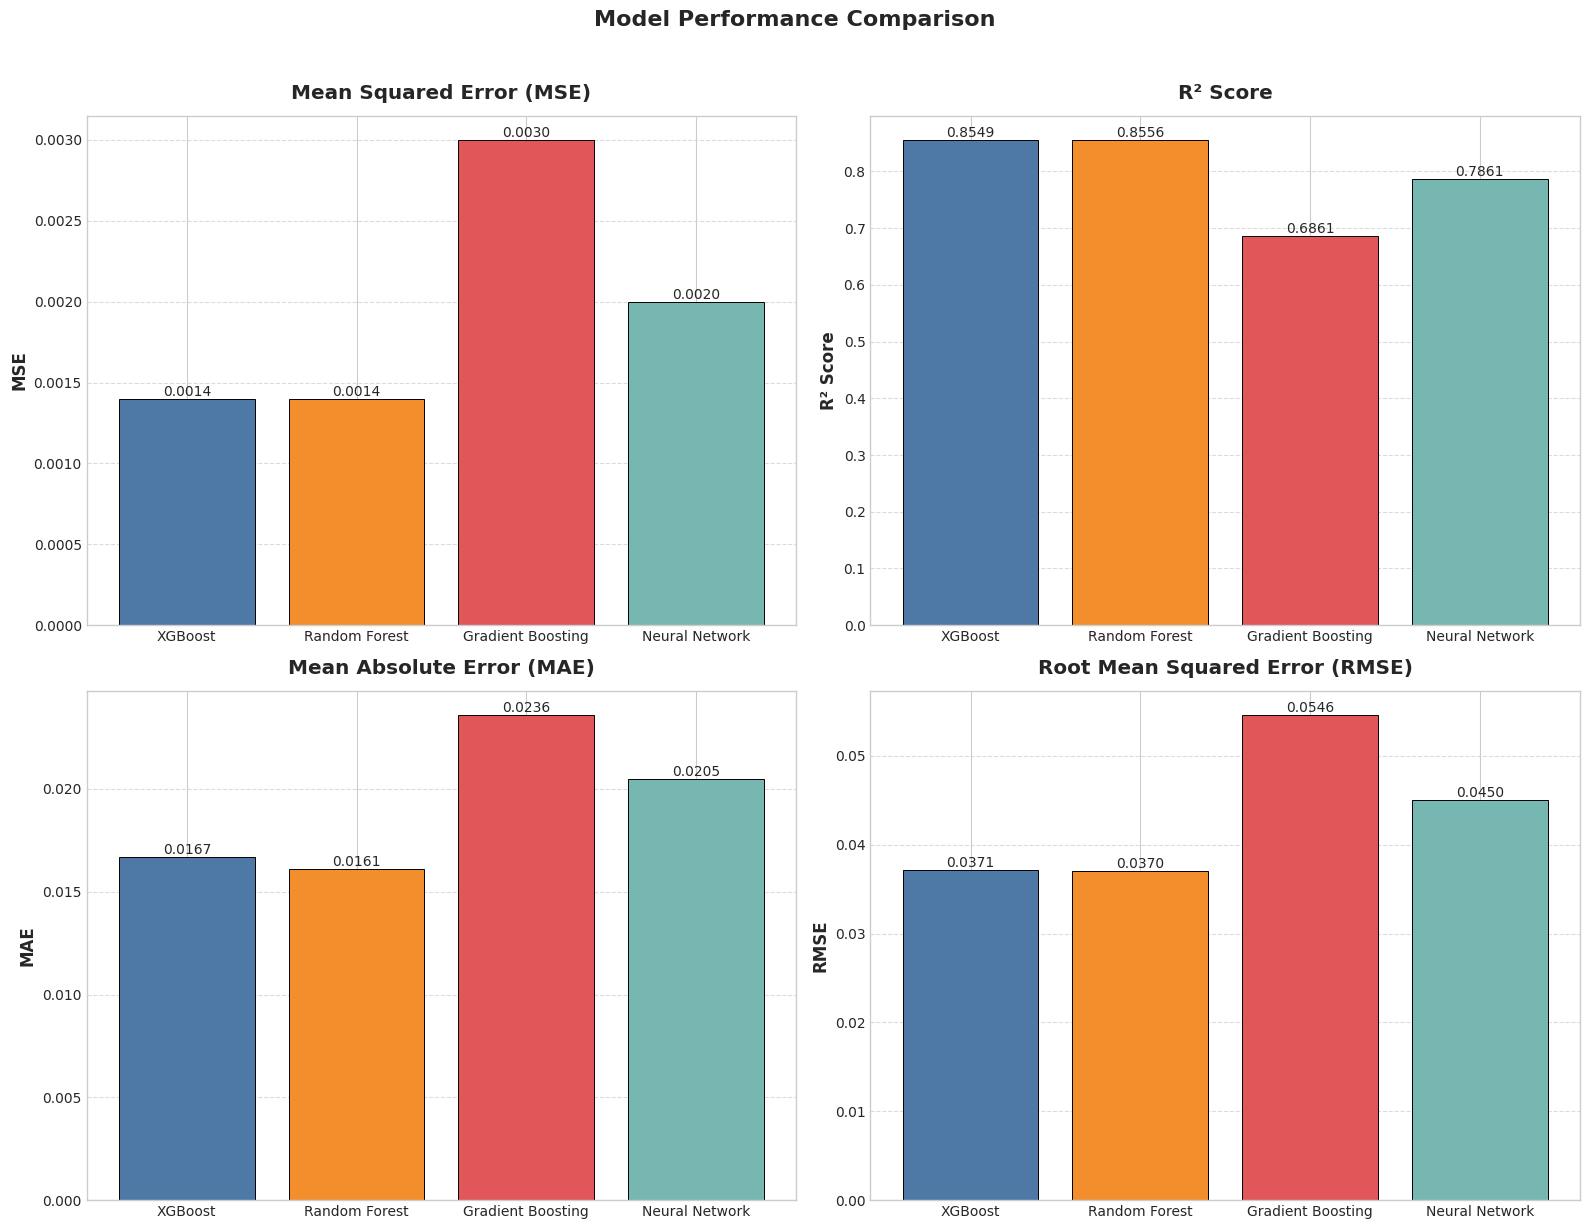

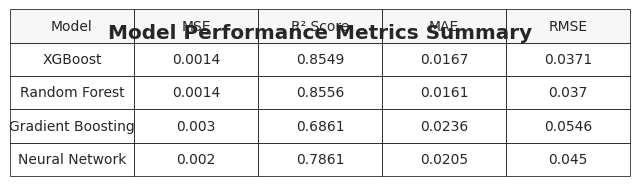

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Check available styles and use the most appropriate one
available_styles = plt.style.available
print("Available styles:", available_styles)  # This will show what's actually available

# Use either 'seaborn' or 'ggplot' or default to 'classic' with grid
if 'seaborn' in available_styles:
    plt.style.use('seaborn')
elif 'ggplot' in available_styles:
    plt.style.use('ggplot')
else:
    plt.style.use('classic')
    plt.rcParams['axes.grid'] = True  # Manually enable grid if using classic

# Set seaborn style for white background with grid
sns.set_style("whitegrid")

# Your performance data
performance_data = {
    'Model': ['XGBoost', 'Random Forest', 'Gradient Boosting', 'Neural Network'],
    'MSE': [0.0014, 0.0014, 0.0030, 0.0020],
    'R² Score': [0.8549, 0.8556, 0.6861, 0.7861],
    'MAE': [0.0167, 0.0161, 0.0236, 0.0205],
    'RMSE': [0.0371, 0.0370, 0.0546, 0.0450]
}
df = pd.DataFrame(performance_data)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold', y=1.02)

# Professional color palette (using Tableau colors)
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2']

# Plot MSE
ax1 = axes[0, 0]
bars1 = ax1.bar(df['Model'], df['MSE'], color=colors, edgecolor='black', linewidth=0.7)
ax1.set_title('Mean Squared Error (MSE)', fontweight='bold', pad=12)
ax1.set_ylabel('MSE', fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10)

# Plot R² Score
ax2 = axes[0, 1]
bars2 = ax2.bar(df['Model'], df['R² Score'], color=colors, edgecolor='black', linewidth=0.7)
ax2.set_title('R² Score', fontweight='bold', pad=12)
ax2.set_ylabel('R² Score', fontweight='bold')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10)

# Plot MAE
ax3 = axes[1, 0]
bars3 = ax3.bar(df['Model'], df['MAE'], color=colors, edgecolor='black', linewidth=0.7)
ax3.set_title('Mean Absolute Error (MAE)', fontweight='bold', pad=12)
ax3.set_ylabel('MAE', fontweight='bold')
ax3.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10)

# Plot RMSE
ax4 = axes[1, 1]
bars4 = ax4.bar(df['Model'], df['RMSE'], color=colors, edgecolor='black', linewidth=0.7)
ax4.set_title('Root Mean Squared Error (RMSE)', fontweight='bold', pad=12)
ax4.set_ylabel('RMSE', fontweight='bold')
ax4.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars4:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()

# Create a metrics summary table
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')
table = ax.table(cellText=df.round(4).values,
                colLabels=df.columns,
                cellLoc='center',
                loc='center',
                colColours=['#f7f7f7']*5)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
plt.title('Model Performance Metrics Summary', fontweight='bold', y=0.8)

plt.show()

## SHAP Values

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def explain_model(model, X_train, X_test, model_type, model_name=""):
    """Generic SHAP explanation function"""
    if model_type == "tree":
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        test_sample = X_test
    elif model_type == "nn":
        # Create prediction function for SHAP
        def predict_fn(X):
            if isinstance(X, pd.DataFrame):
                X = X.values
            return model.predict(X).flatten()

        # Use unscaled one-hot encoded data
        background = shap.utils.sample(X_train.values, 100, random_state=42)
        test_sample = shap.utils.sample(X_test.values, 100, random_state=42)
        explainer = shap.KernelExplainer(predict_fn, background)
        shap_values = explainer.shap_values(test_sample)
    else:
        # For generic models
        background = shap.utils.sample(X_train.values, 100, random_state=42)
        test_sample = shap.utils.sample(X_test.values, 100, random_state=42)
        explainer = shap.KernelExplainer(model.predict, background)
        shap_values = explainer.shap_values(test_sample)

    # Plotting
    feature_names = X_test.columns
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, test_sample, feature_names=feature_names, plot_type="bar", show=False)
    plt.title(f"SHAP Feature Importance - {model_name or model.__class__.__name__}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, test_sample, feature_names=feature_names, show=False)
    plt.title(f"SHAP Value Distribution - {model_name or model.__class__.__name__}")
    plt.tight_layout()
    plt.show()

    return explainer, shap_values


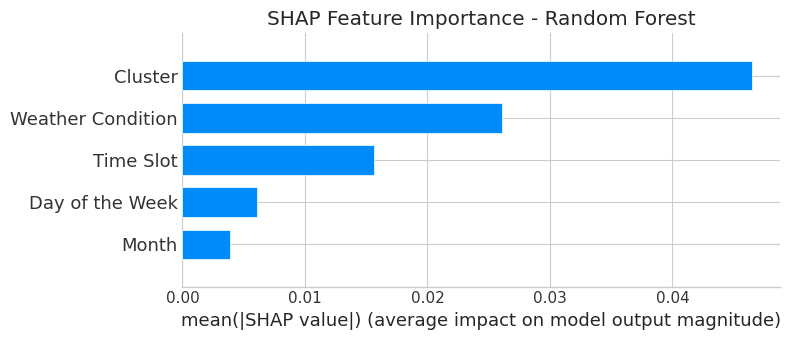

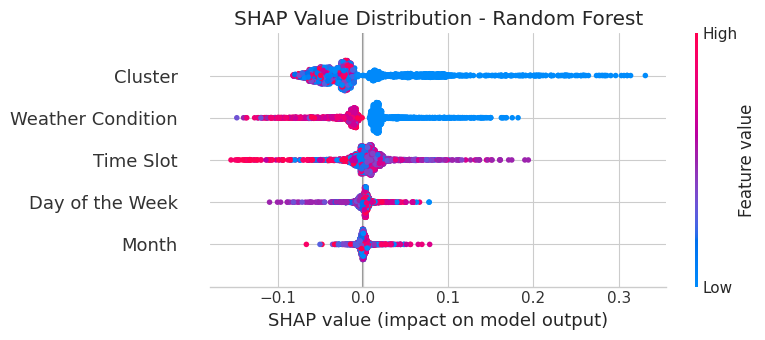

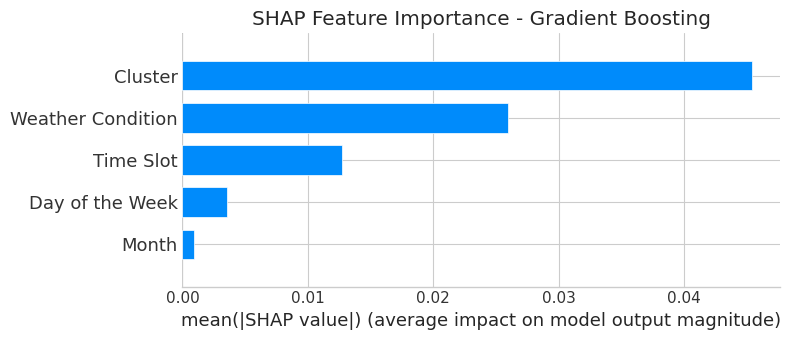

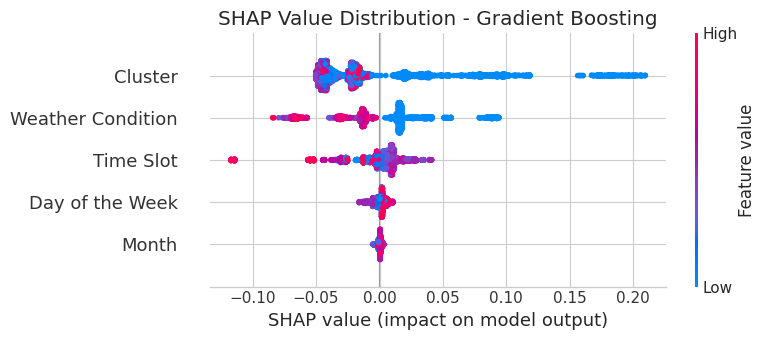

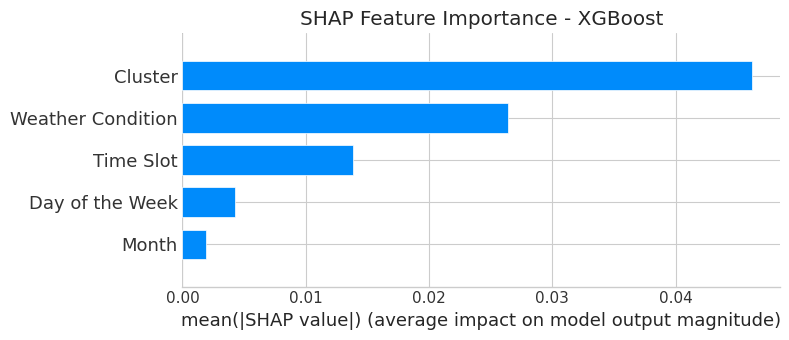

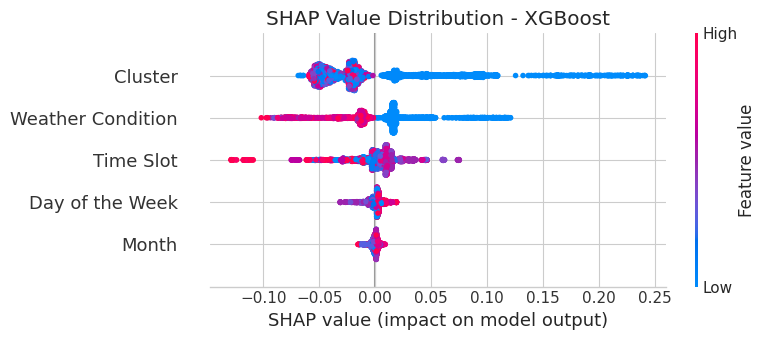

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
6550/6550 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
6550/6550 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6550/6550 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6550/6550 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
6550/6550 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
6550/6550 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6550/6550 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
6550/6550 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
6550/6550 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
6550/6550 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
6550/6550 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
6550/6550 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━

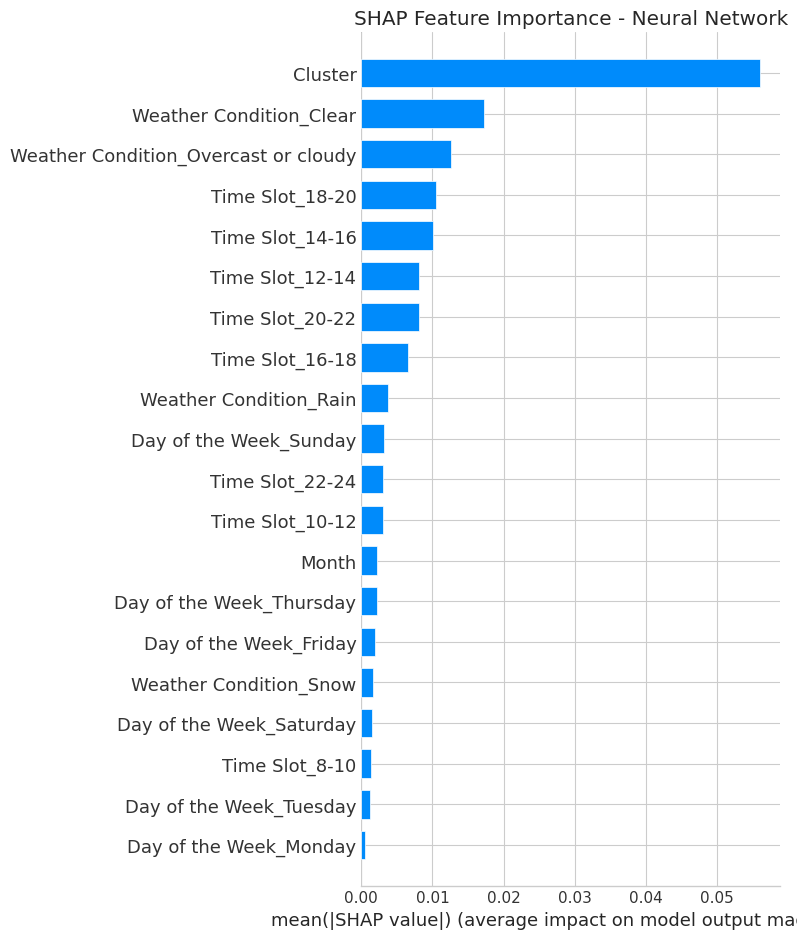

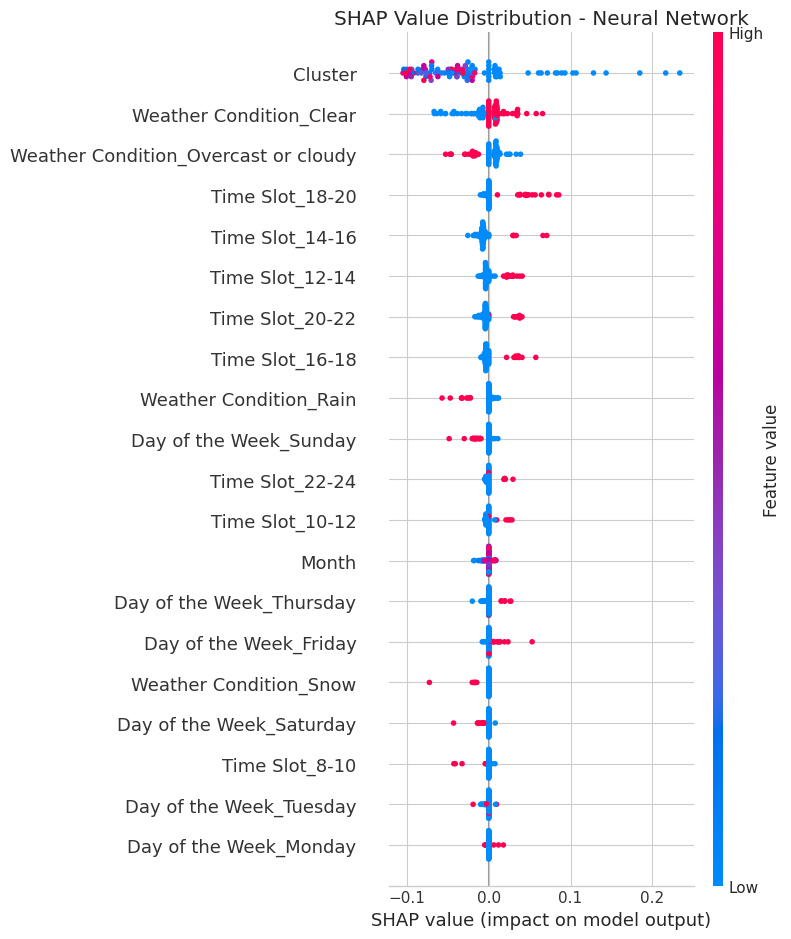

In [ ]:
# Tree-based models use label-encoded input
explainer_rf, sv_rf = explain_model(model, X_train, X_test, "tree", "Random Forest")
explainer_gb, sv_gb = explain_model(model_gb, X_train, X_test, "tree", "Gradient Boosting")
explainer_xgb, sv_xgb = explain_model(model_xgb, X_train, X_test, "tree", "XGBoost")

# Neural Network uses one-hot encoded, unscaled input
explainer_nn, sv_nn = explain_model(model_nn, X_train_nn, X_test_nn, "nn", "Neural Network")

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


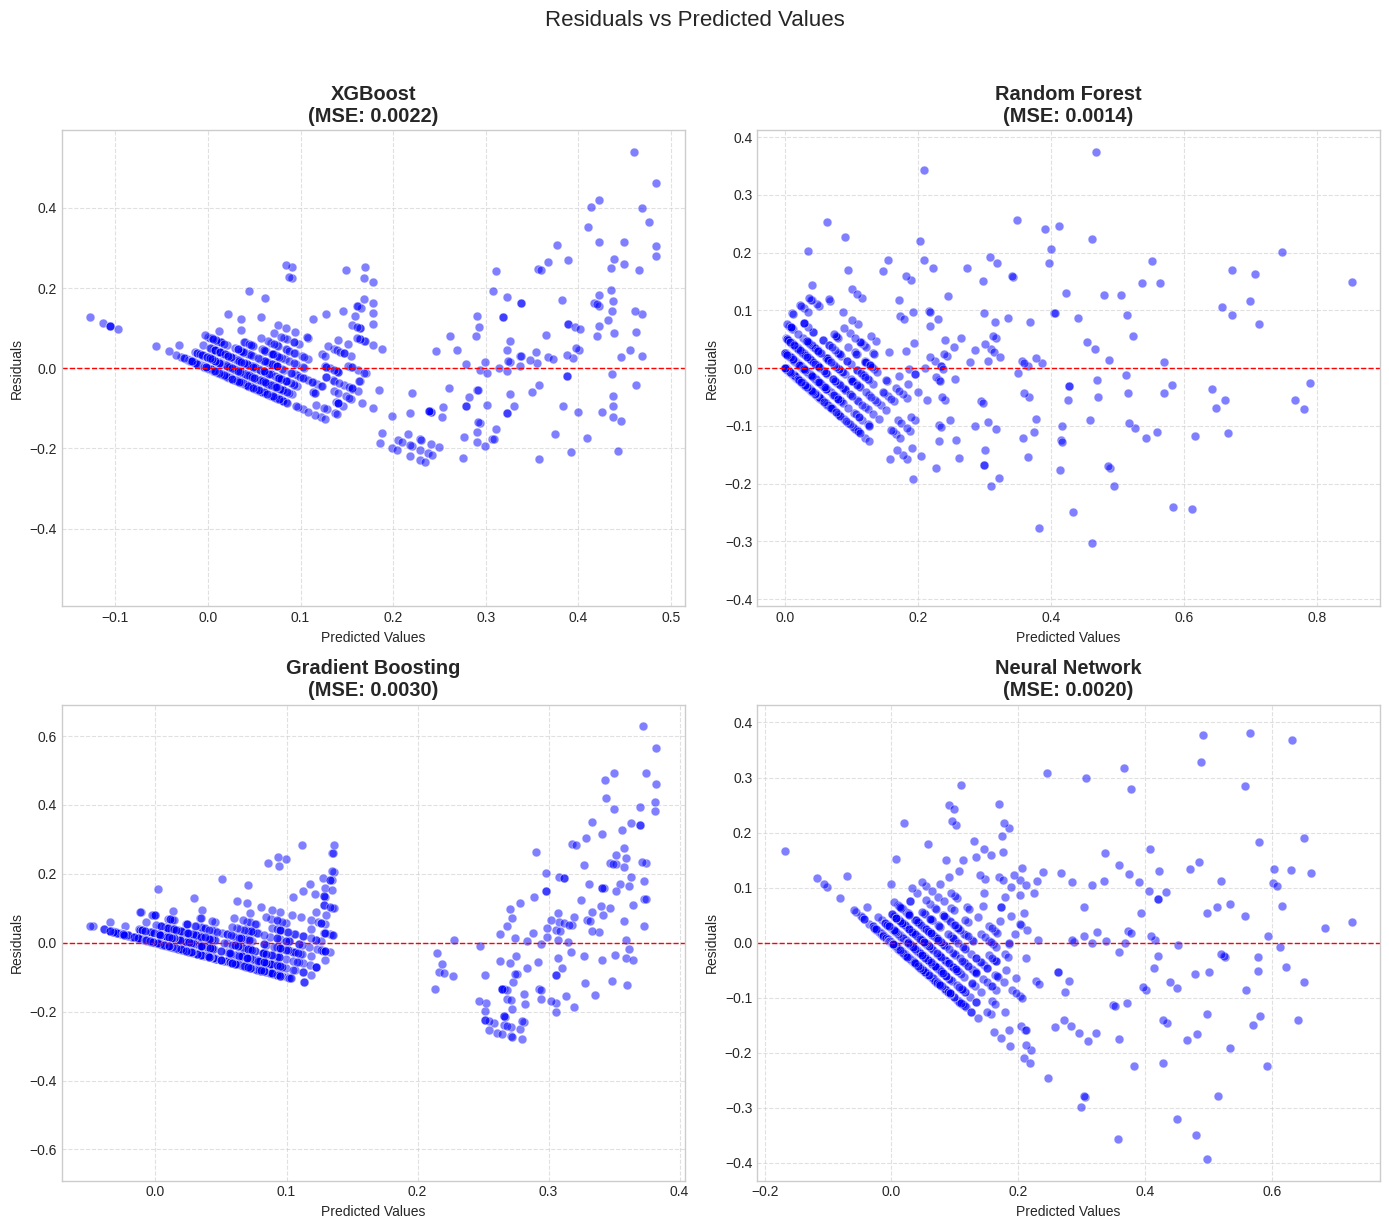

In [ ]:
# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Residuals vs Predicted Values', fontsize=16, y=1.02)

# Dictionary to store all models and their names
models = {
    'XGBoost': model_xgb,
    'Random Forest': rf_model,
    'Gradient Boosting': model_gb,
    'Neural Network': model_nn
}

# Generate predictions and residuals for each model
for idx, (model_name, model_instance) in enumerate(models.items()):
    ax = axes[idx//2, idx%2]  # Determine subplot position

    # Get predictions (handle NN separately)
    if model_name == 'Neural Network':
        y_pred = model_instance.predict(X_test_nn).flatten()
        true_values = y_test_nn
    else:
        y_pred = model_instance.predict(X_test)
        true_values = y_test

    residuals = true_values - y_pred

    # Create scatter plot
    ax.scatter(y_pred, residuals, alpha=0.5, color='blue', edgecolor='w', s=40)

    # Add horizontal line at y=0
    ax.axhline(y=0, color='red', linestyle='--', linewidth=1)

    # Calculate and display MSE
    mse = mean_squared_error(true_values, y_pred)

    # Formatting
    ax.set_title(f'{model_name}\n(MSE: {mse:.4f})', fontweight='bold')
    ax.set_xlabel('Predicted Values', fontsize=10)
    ax.set_ylabel('Residuals', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)

    # Set symmetrical y-limits
    max_resid = np.max(np.abs(residuals))
    ax.set_ylim(-max_resid * 1.1, max_resid * 1.1)

plt.tight_layout()
plt.show()


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


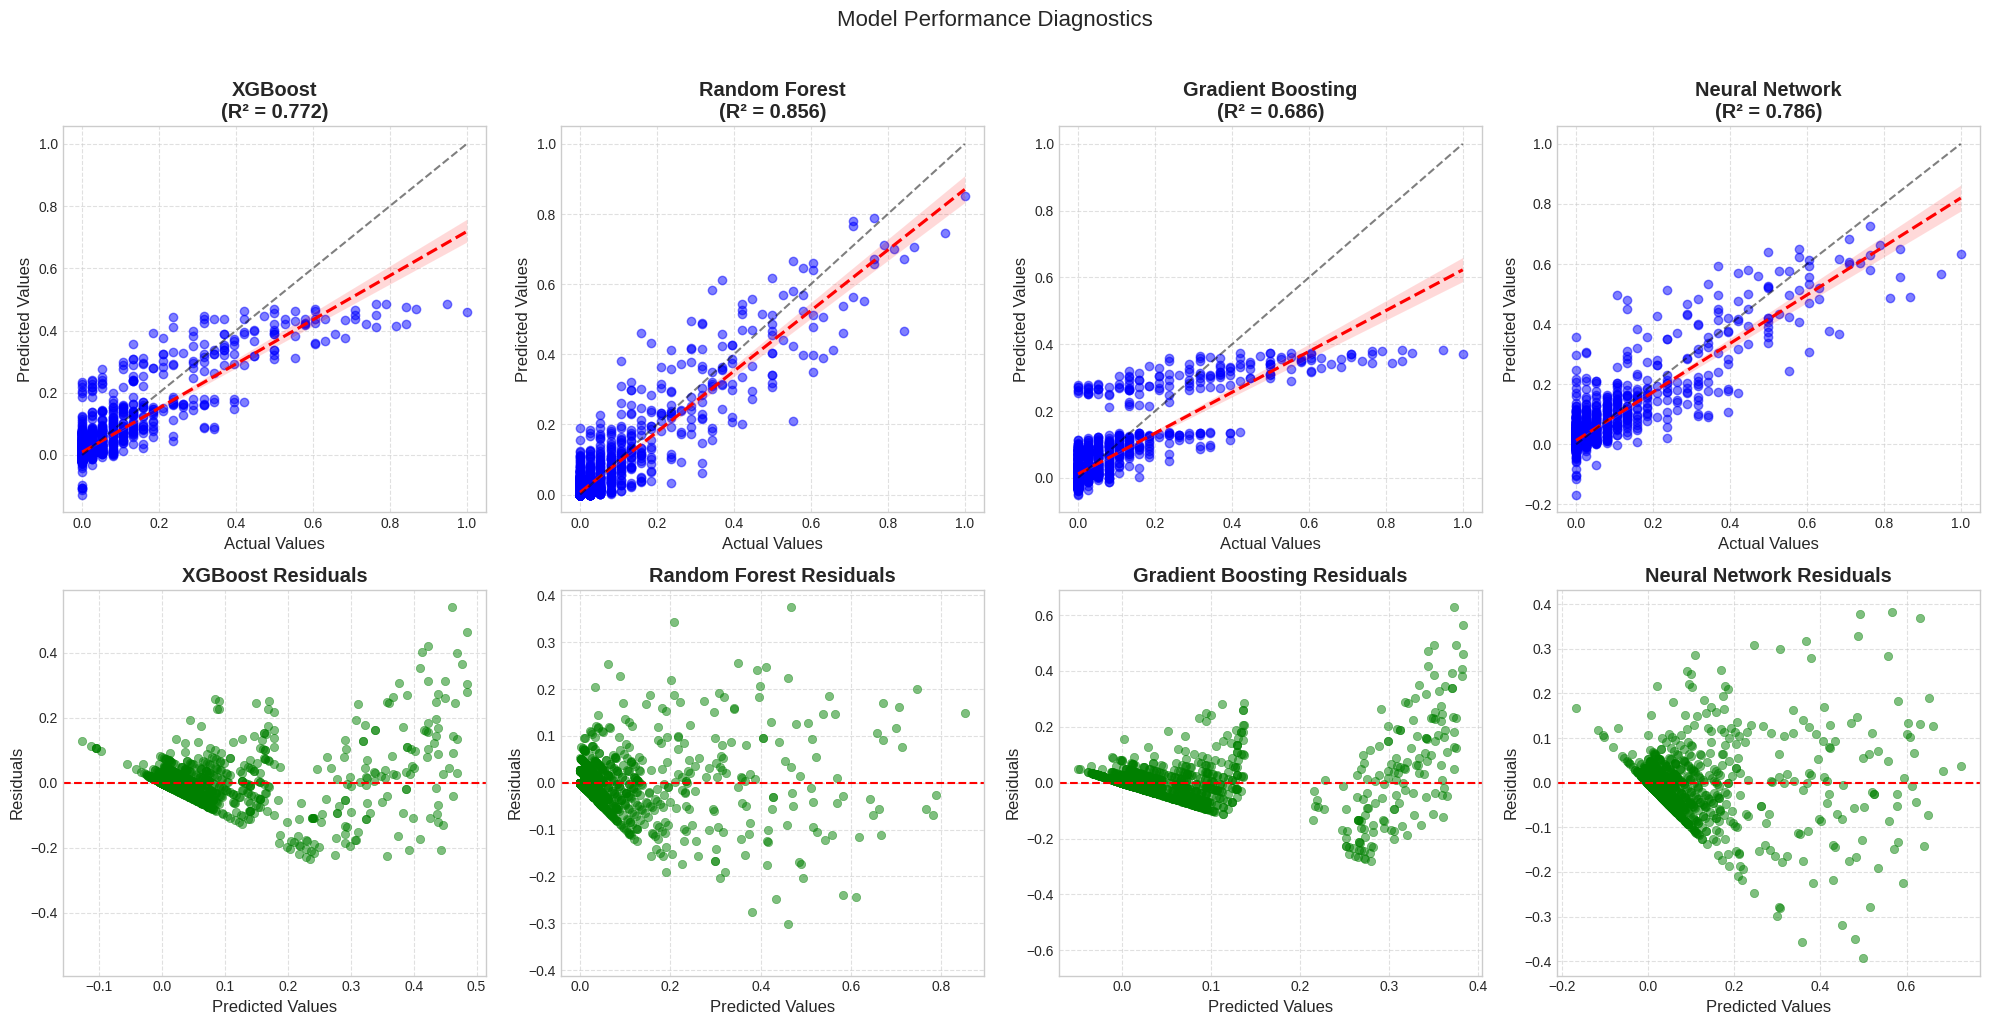

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Create figure
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle('Model Performance Diagnostics', fontsize=16, y=1.02)

# Dictionary of models
models = {
    'XGBoost': model_xgb,
    'Random Forest': rf_model,
    'Gradient Boosting': model_gb,
    'Neural Network': model_nn
}

# Generate plots for each model
for idx, (model_name, model_instance) in enumerate(models.items()):
    # Select axes
    ax1 = axes[0, idx]
    ax2 = axes[1, idx]

    # Handle input & output sources correctly
    if model_name == 'Neural Network':
        X_input = X_test_nn
        y_true = y_test_nn
        y_pred = model_instance.predict(X_input).flatten()
    else:
        X_input = X_test
        y_true = y_test
        y_pred = model_instance.predict(X_input).flatten() if hasattr(model_instance.predict(X_input), 'flatten') else model_instance.predict(X_input)

    # Residuals
    residuals = y_true - y_pred
    r2 = r2_score(y_true, y_pred)

    # --- Actual vs Predicted ---
    sns.regplot(x=y_true, y=y_pred, ax=ax1,
                scatter_kws={'alpha': 0.5, 'color': 'blue'},
                line_kws={'color': 'red', 'linestyle': '--'})

    # Perfect prediction line
    ax1.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             'k--', alpha=0.5)

    ax1.set_title(f'{model_name}\n(R² = {r2:.3f})', fontweight='bold')
    ax1.set_xlabel('Actual Values')
    ax1.set_ylabel('Predicted Values')
    ax1.grid(True, linestyle='--', alpha=0.6)

    # --- Residual Plot ---
    ax2.scatter(y_pred, residuals, alpha=0.5, color='green')
    ax2.axhline(y=0, color='red', linestyle='--')
    ax2.set_title(f'{model_name} Residuals', fontweight='bold')
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Residuals')
    ax2.grid(True, linestyle='--', alpha=0.6)

    # Symmetric y-limits
    max_resid = np.max(np.abs(residuals))
    ax2.set_ylim(-max_resid * 1.1, max_resid * 1.1)

plt.tight_layout()
plt.show()


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


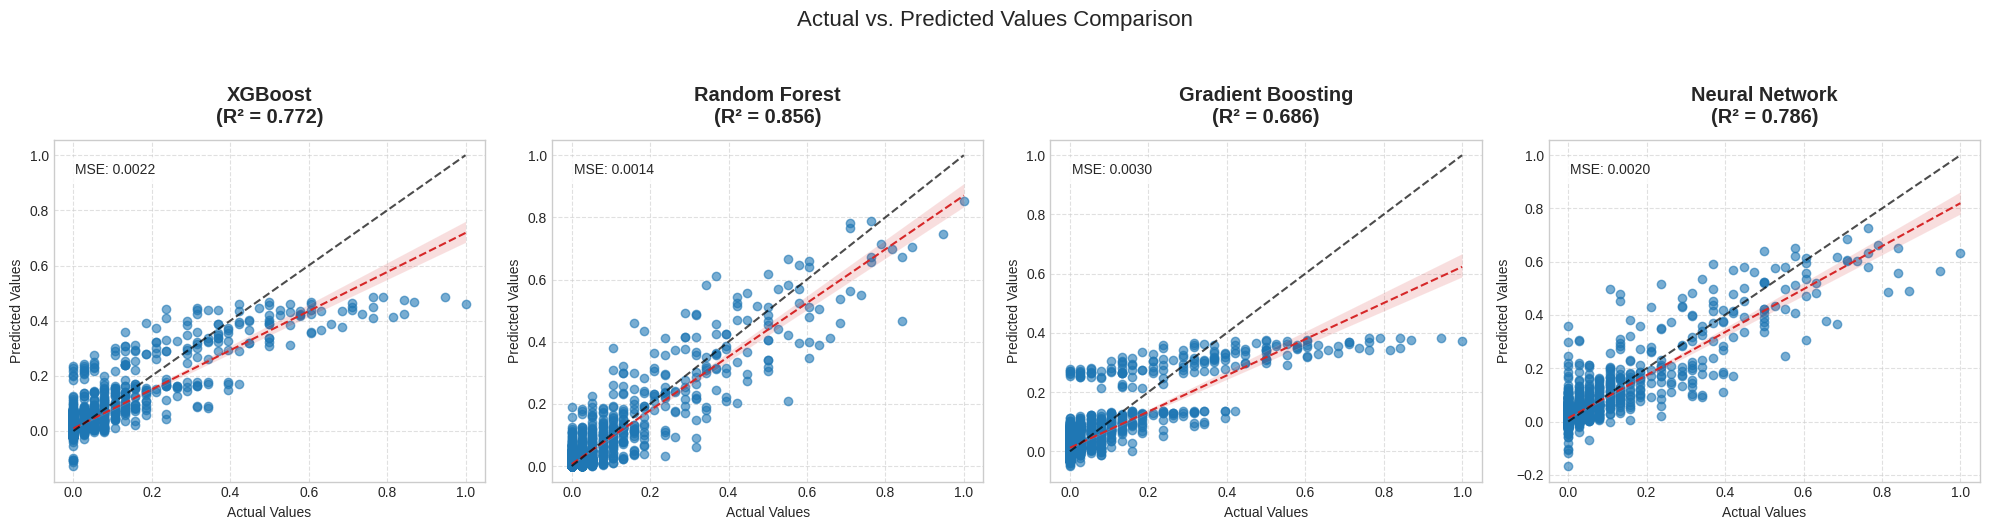

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Create figure with 1 row and 4 columns (one per model)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
plt.subplots_adjust(wspace=0.3)
fig.suptitle('Actual vs. Predicted Values Comparison', fontsize=16, y=1.05)

# Dictionary of models
models = {
    'XGBoost': model_xgb,
    'Random Forest': rf_model,
    'Gradient Boosting': model_gb,
    'Neural Network': model_nn
}

# Generate plots for each model
for idx, (model_name, model_instance) in enumerate(models.items()):
    # Get predictions and matching test set
    if model_name == 'Neural Network':
        X_input = X_test_nn
        y_true = y_test_nn
        y_pred = model_instance.predict(X_input).flatten()
    else:
        X_input = X_test
        y_true = y_test
        y_pred = model_instance.predict(X_input)
        if y_pred.ndim > 1:
            y_pred = y_pred.flatten()

    # Calculate R² score
    r2 = r2_score(y_true, y_pred)

    # Create scatter plot with regression line
    ax = axes[idx]
    sns.regplot(x=y_true, y=y_pred, ax=ax,
                scatter_kws={'alpha': 0.6, 'color': '#1f77b4'},
                line_kws={'color': '#d62728', 'linestyle': '--', 'linewidth': 1.5})

    # Perfect prediction line
    ax.plot([y_true.min(), y_true.max()],
            [y_true.min(), y_true.max()],
            'k--', alpha=0.7)

    # Formatting
    ax.set_title(f'{model_name}\n(R² = {r2:.3f})', fontweight='bold', pad=12)
    ax.set_xlabel('Actual Values', fontsize=10)
    ax.set_ylabel('Predicted Values', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)

    # MSE annotation
    mse = np.mean((y_true - y_pred) ** 2)
    ax.text(0.05, 0.9, f'MSE: {mse:.4f}',
            transform=ax.transAxes, fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()
